# MA3832 Week 4

Repeat step 1-3 from Week 3 to download and pre-process Mnist data


In [7]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
from keras.datasets import fashion_mnist #get Fashion MNIST from Keras
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import categorical_crossentropy

#**********************************************************
# Download data
#**********************************************************

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
#**********************************************************************
# Constructing a neural network
#**********************************************************************
# define image dimensions
img_rows, img_cols = 28, 28 #images are 28*28 pixels



# Preprocessing data

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

num_class = 10;
y_train = to_categorical(y_train, num_class)
y_test = to_categorical(y_test,num_class)


print("y_test:", y_test)

y_test: [[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Build neural network
Number of hidden layers = 2
 - First hidden layer includes 64 neurons
 - Second hidden layers includes 32 neurons 
 
Use non-saturating activation function with he_normal initialization <br>
Dropout at the last layer <br>
Use Momemtum optimisation 

In [8]:

tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(64, activation="leaky_relu",kernel_initializer="he_normal"),
    keras.layers.Dense(32, activation="leaky_relu",kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

# Compile model
model.compile(loss=categorical_crossentropy, optimizer=SGD(lr=0.001, momentum=0.9),
              metrics=['accuracy'])

# Train model using Early stop

early_stopping = keras.callbacks.EarlyStopping(patience=10)
history = model.fit(x_train, y_train, validation_split=0.1,epochs=100, callbacks=early_stopping)




Epoch 1/100
1688/1688 [==============================] - 3s 2ms/step - loss: 0.8925 - accuracy: 0.6956 - val_loss: 0.5591 - val_accuracy: 0.8002
Epoch 2/100
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5674 - accuracy: 0.8036 - val_loss: 0.4750 - val_accuracy: 0.8317
Epoch 3/100
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5047 - accuracy: 0.8244 - val_loss: 0.4488 - val_accuracy: 0.8395
Epoch 4/100
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4774 - accuracy: 0.8331 - val_loss: 0.4286 - val_accuracy: 0.8418
Epoch 5/100
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4554 - accuracy: 0.8396 - val_loss: 0.4118 - val_accuracy: 0.8503
Epoch 6/100
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4373 - accuracy: 0.8448 - val_loss: 0.4043 - val_accuracy: 0.8512
Epoch 7/100
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4268 - accuracy: 0.8501 - val_loss: 0.4027 - val_ac

### Plotting 

Test loss    : 0.35974249243736267
Test accuracy: 0.870199978351593


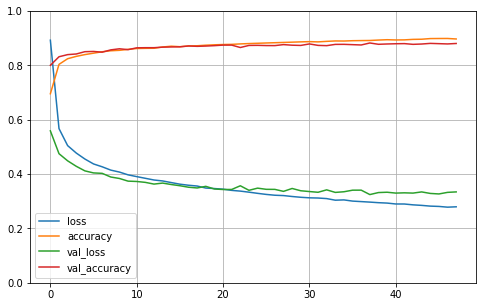

In [9]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss    :', score[0])
print('Test accuracy:', score[1])


### Use nadam optimiser with exponential scheduling for learning rate

In [10]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.05, s=5)
model1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(64, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(32, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model1.compile(loss="categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 15

lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
pixel_means = x_train.mean(axis=0, keepdims=True)
pixel_stds = x_train.std(axis=0, keepdims=True)
x_train_scaled = (x_train - pixel_means) / pixel_stds
history = model.fit(x_train, y_train, epochs=n_epochs,
                    validation_split=0.1,
                    callbacks=[lr_scheduler])

Epoch 1/15
1688/1688 [==============================] - 3s 2ms/step - loss: 0.6004 - accuracy: 0.7919 - val_loss: 0.5398 - val_accuracy: 0.8175 - lr: 0.0500
Epoch 2/15
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4292 - accuracy: 0.8451 - val_loss: 0.4077 - val_accuracy: 0.8553 - lr: 0.0315
Epoch 3/15
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3737 - accuracy: 0.8624 - val_loss: 0.3624 - val_accuracy: 0.8672 - lr: 0.0199
Epoch 4/15
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3365 - accuracy: 0.8774 - val_loss: 0.3574 - val_accuracy: 0.8733 - lr: 0.0126
Epoch 5/15
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3153 - accuracy: 0.8850 - val_loss: 0.3504 - val_accuracy: 0.8707 - lr: 0.0079
Epoch 6/15
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3009 - accuracy: 0.8888 - val_loss: 0.3424 - val_accuracy: 0.8740 - lr: 0.0050
Epoch 7/15
1688/1688 [==============================] - 3s

### Plotting

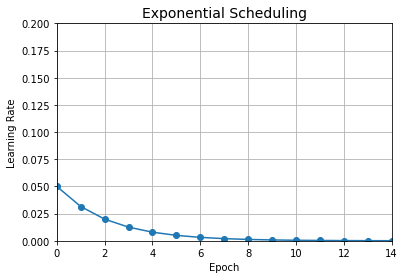

In [11]:
plt.figure()
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.2])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

## Transfer learning

Split the fashion MNIST training set into 2 datasets:
- X_train_A: all images of all items for sandals and shirts (classes 5 and 6)
- X_train_B: the first 200 images of sandals and shirts

In [12]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should now become 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

# Normalise data

(Xtrain_A, ytrain_A), (Xtrain_B, ytrain_B) = split_dataset(x_train/255, y_train)
(Xtest_A, ytest_A), (Xtest_B, ytest_B) = split_dataset(x_test/255, y_test)
Xtrain_B = Xtrain_B[:200]
ytrain_B = ytrain_B[:200]




### Train model A
MLP has 5 hidden layers:
 - first hidden layer has 300 neurons
 - second hidden layers had 100 neurons
 - the last three contains 50 neurons

In [13]:
# Train model
tf.random.set_seed(12)
np.random.seed(12)
modelA = keras.models.Sequential()
modelA.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    modelA.add(keras.layers.Dense(n_hidden, activation="selu"))
modelA.add(keras.layers.Dense(8, activation="softmax"))

modelA.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])
history = modelA.fit(Xtrain_A, ytrain_A, epochs=10,
                    validation_split=0.1)


# Save model

modelA.save("model_A.h5")

Epoch 1/10


/home/tri083/Dropbox/TEACHING/MA3832/SP2_2022/Practicals/Code/env/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1350/1350 [==============================] - 5s 4ms/step - loss: 0.5849 - accuracy: 0.8100 - val_loss: 0.3856 - val_accuracy: 0.8654
Epoch 2/10
1350/1350 [==============================] - 5s 4ms/step - loss: 0.3546 - accuracy: 0.8777 - val_loss: 0.3363 - val_accuracy: 0.8813
Epoch 3/10
1350/1350 [==============================] - 5s 4ms/step - loss: 0.3177 - accuracy: 0.8902 - val_loss: 0.3082 - val_accuracy: 0.8906
Epoch 4/10
1350/1350 [==============================] - 5s 4ms/step - loss: 0.2991 - accuracy: 0.8966 - val_loss: 0.2928 - val_accuracy: 0.8940
Epoch 5/10
1350/1350 [==============================] - 5s 4ms/step - loss: 0.2860 - accuracy: 0.9010 - val_loss: 0.2814 - val_accuracy: 0.8969
Epoch 6/10
1350/1350 [==============================] - 6s 4ms/step - loss: 0.2759 - accuracy: 0.9054 - val_loss: 0.2732 - val_accuracy: 0.9010
Epoch 7/10
1350/1350 [==============================] - 5s 4ms/step - loss: 0.2680 - accuracy: 0.9083 - val_loss: 0.2704 - val_accuracy: 0.9050
Epo

### Load the model A and obtain the weights from model A to fit model B

In [19]:
# Load model A

modelA = keras.models.load_model("model_A.h5")

# Clone Model A to avoid weights in model A changing while training model B
modelA_clone = keras.models.clone_model(modelA)
modelA_clone.set_weights(modelA.get_weights())

modelB = keras.models.Sequential(modelA_clone.layers[:-1]) # keep all hidden layers 
                                                           # except the last output hiddien layers
modelB.add(keras.layers.Dense(1, activation="sigmoid"))



### Resuse hidden layers of Model A for dataset A to classify sandals and shirts in dataset B

In [20]:
# To avoid the large error in computing gradients for the new output layers,
# we first freeze the reused layers in ModelA during the first epochs, and then
# unfreeze the reused layers later  
for layer in modelB.layers[:-1]:
    layer.trainable = False

modelB.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])


history = modelB.fit(Xtrain_B, ytrain_B, epochs=4,
                           validation_split=0.1)



Epoch 1/4
6/6 [==============================] - 0s 20ms/step - loss: 1.0615 - accuracy: 0.3722 - val_loss: 1.2828 - val_accuracy: 0.1500
Epoch 2/4
6/6 [==============================] - 0s 4ms/step - loss: 0.9953 - accuracy: 0.3944 - val_loss: 1.2130 - val_accuracy: 0.1500
Epoch 3/4
6/6 [==============================] - 0s 6ms/step - loss: 0.9353 - accuracy: 0.4500 - val_loss: 1.1473 - val_accuracy: 0.2000
Epoch 4/4
6/6 [==============================] - 0s 5ms/step - loss: 0.8795 - accuracy: 0.4833 - val_loss: 1.0871 - val_accuracy: 0.2000


In [21]:


# unfrezee the resused layers of ModelA

for layer in modelB.layers[:-1]:
    layer.trainable = True

modelB.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
history = modelB.fit(Xtrain_B, ytrain_B, epochs=10,
                           validation_split=0.1)

modelB.evaluate(Xtest_B, ytest_B) 

Epoch 1/10
6/6 [==============================] - 0s 19ms/step - loss: 0.7268 - accuracy: 0.5444 - val_loss: 0.7066 - val_accuracy: 0.5000
Epoch 2/10
6/6 [==============================] - 0s 5ms/step - loss: 0.4921 - accuracy: 0.7833 - val_loss: 0.5272 - val_accuracy: 0.8000
Epoch 3/10
6/6 [==============================] - 0s 6ms/step - loss: 0.3717 - accuracy: 0.8611 - val_loss: 0.4278 - val_accuracy: 0.8500
Epoch 4/10
6/6 [==============================] - 0s 6ms/step - loss: 0.2967 - accuracy: 0.9222 - val_loss: 0.3717 - val_accuracy: 0.9000
Epoch 5/10
6/6 [==============================] - 0s 8ms/step - loss: 0.2477 - accuracy: 0.9333 - val_loss: 0.3368 - val_accuracy: 0.9000
Epoch 6/10
6/6 [==============================] - 0s 6ms/step - loss: 0.2131 - accuracy: 0.9444 - val_loss: 0.3147 - val_accuracy: 0.9000
Epoch 7/10
6/6 [==============================] - 0s 6ms/step - loss: 0.1873 - accuracy: 0.9444 - val_loss: 0.2970 - val_accuracy: 0.9000
Epoch 8/10
6/6 [=================

[0.13196609914302826, 0.9750000238418579]